# Dask RandomSearchCV Experiment

* https://ml.dask.org/modules/generated/dask_ml.model_selection.KFold.html
* https://ml.dask.org/modules/generated/dask_ml.model_selection.RandomizedSearchCV.html
* https://examples.dask.org/machine-learning/incremental.html
* https://ml.dask.org/modules/generated/dask_ml.model_selection.train_test_split.html
* https://distributed.dask.org/en/latest/memory.html
* https://docs.dask.org/en/latest/dataframe-best-practices.html

In [1]:
import sys
!{sys.executable} -m pip install dask_ml

     |████████████████████████████████| 141 kB 5.6 MB/s 


In [2]:
#import sys
#!{sys.executable} -m pip install scikit-multilearn

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd


In [5]:
#asteroid_data = pd.read_csv('pha-ml/Dataset/dataset.csv').sort_index(axis=0)

In [6]:
asteroid_data = pd.read_csv('https://www.scidrive.org/vospace-2.0/data/aa1277b6-e727-405c-9006-263fe48c4434').sort_index(axis=0)

In [7]:
asteroid_data.head(5)

id    spkid       full_name pdes     name prefix neo pha     H  \
0  a0000001  2000001         1 Ceres    1    Ceres    NaN   N   N  3.40   
1  a0000002  2000002        2 Pallas    2   Pallas    NaN   N   N  4.20   
2  a0000003  2000003          3 Juno    3     Juno    NaN   N   N  5.33   
3  a0000004  2000004         4 Vesta    4    Vesta    NaN   N   N  3.00   
4  a0000005  2000005       5 Astraea    5  Astraea    NaN   N   N  6.90   

   diameter  ...       sigma_i      sigma_om       sigma_w      sigma_ma  \
0   939.400  ...  4.608900e-09  6.168800e-08  6.624800e-08  7.820700e-09   
1   545.000  ...  3.469400e-06  6.272400e-06  9.128200e-06  8.859100e-06   
2   246.596  ...  3.223100e-06  1.664600e-05  1.772100e-05  8.110400e-06   
3   525.400  ...  2.170600e-07  3.880800e-07  1.789300e-07  1.206800e-06   
4   106.699  ...  2.740800e-06  2.894900e-05  2.984200e-05  8.303800e-06   

       sigma_ad       sigma_n      sigma_tp     sigma_per  class      rms  
0  1.111300e-11  1.196500e-12  3.782900e-08  9.415900e-09    MBA  0.43301  
1  4.961300e-09  4.653600e-10  4.078700e-05  3.680700e-06    MBA  0.35936  
2  4.363900e-09  4.413400e-10  3.528800e-05  3.107200e-06    MBA  0.33848  
3  1.648600e-09  2.612500e-10  4.103700e-06  1.274900e-06    MBA  0.39980  
4  4.729000e-09  5.522700e-10  3.474300e-05  3.490500e-06    MBA  0.52191  

[5 rows x 45 columns]

In [8]:
asteroid_data.tail(5)

id    spkid          full_name      pdes name prefix neo pha  \
958519  bPLS6013  3246801         (6013 P-L)  6013 P-L  NaN    NaN   N   N   
958520  bPLS6331  3246834         (6331 P-L)  6331 P-L  NaN    NaN   N   N   
958521  bPLS6344  3013075         (6344 P-L)  6344 P-L  NaN    NaN   Y   Y   
958522  bT2S2060  3246457         (2060 T-2)  2060 T-2  NaN    NaN   N   N   
958523  bT3S2678  3246553         (2678 T-3)  2678 T-3  NaN    NaN   N   N   

             H  diameter  ...   sigma_i  sigma_om    sigma_w   sigma_ma  \
958519  17.135       NaN  ...  6.969000  7.433000  46.311000  27.383000   
958520  18.500       NaN  ...  0.000016  0.000056   0.000238   0.000130   
958521  20.400       NaN  ...  0.000019  0.000057   0.000090   0.000053   
958522  18.071       NaN  ...  0.544880  4.391600  18.988000  10.838000   
958523  18.060       NaN  ...  1.102300  0.311700   1.284300   0.473610   

            sigma_ad       sigma_n    sigma_tp   sigma_per  class      rms  
958519  1.041200e+00  1.652100e-01  130.970000  726.490000    MBA  0.23839  
958520  2.418900e-08  3.346100e-09    0.000469    0.000016    MBA  0.53633  
958521  1.650100e-07  1.101600e-08    0.000283    0.000091    APO  0.51556  
958522  7.171600e-01  1.016700e-01   38.984000  503.550000    MBA  0.25641  
958523  1.626700e-01  2.487900e-02    5.523600  106.480000    MBA  0.26980  

[5 rows x 45 columns]

In [9]:
asteroid_data.isnull().sum()

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926


In [10]:
asteroid_data.shape

(958524, 45)

In [11]:
dataframe=asteroid_data.drop(columns=['spkid','name','epoch','prefix','orbit_id','id','pha','full_name','pdes','diameter_sigma','epoch_mjd','epoch_cal','equinox','neo','sigma_e','sigma_a','sigma_q','sigma_i','sigma_om','sigma_om','sigma_w','sigma_ma','sigma_ad','sigma_n','sigma_tp','sigma_per','rms','per_y','moid','tp','tp_cal'])

In [12]:
dataframe.head(5)

H  diameter  albedo         e         a         q          i  \
0  3.40   939.400  0.0900  0.076009  2.769165  2.558684  10.594067   
1  4.20   545.000  0.1010  0.229972  2.773841  2.135935  34.832932   
2  5.33   246.596  0.2140  0.256936  2.668285  1.982706  12.991043   
3  3.00   525.400  0.4228  0.088721  2.361418  2.151909   7.141771   
4  6.90   106.699  0.2740  0.190913  2.574037  2.082619   5.367427   

           om           w          ma        ad         n          per  \
0   80.305531   73.597695   77.372098  2.979647  0.213885  1683.145703   
1  173.024741  310.202392  144.975675  3.411748  0.213345  1687.410992   
2  169.851482  248.066193  125.435355  3.353865  0.226129  1592.013769   
3  103.810804  150.728541   95.861938  2.570926  0.271609  1325.432763   
4  141.571026  358.648418   17.846343  3.065455  0.238661  1508.414421   

      moid_ld class  
0  620.640533   MBA  
1  480.348639   MBA  
2  402.514639   MBA  
3  443.451432   MBA  
4  426.433028   MBA

In [13]:
dataframe.tail(5)

H  diameter  albedo         e         a         q         i  \
958519  17.135       NaN     NaN  0.185919  2.280861  1.856807  5.984416   
958520  18.500       NaN     NaN  0.282920  2.334910  1.674319  8.082280   
958521  20.400       NaN     NaN  0.662446  2.817152  0.950941  4.679278   
958522  18.071       NaN     NaN  0.202053  2.373137  1.893638  0.732484   
958523  18.060       NaN     NaN  0.258348  2.260404  1.676433  9.661947   

                om           w          ma        ad         n          per  \
958519  194.229902  195.442802  342.057565  2.704916  0.286125  1258.191614   
958520  355.248239    5.216223  260.113042  2.995502  0.276248  1303.177916   
958521  182.982832  234.894852  240.473601  4.683363  0.208444  1727.085364   
958522  176.499082  198.026527  355.351127  2.852636  0.269600  1335.311579   
958523  204.512448  148.496988   15.320134  2.844376  0.290018  1241.302609   

           moid_ld class  
958519  335.456367   MBA  
958520  261.227249   MBA  
958521   13.850093   APO  
958522  347.877506   MBA  
958523  264.721217   MBA

In [14]:
dataframe.isnull().sum()



H             6263
diameter    822315
albedo      823421
e                0
a                0
q                0
i                0
om               0
w                0
ma               1
ad               4
n                0
per              4
moid_ld        127
class            0
dtype: int64

In [15]:
dataframe['class'].value_counts()

MBA    855954
OMB     28355
IMB     20360
MCA     18685
APO     12687
AMO      8457
TJN      8221
TNO      3468
ATE      1729
CEN       506
AST        76
IEO        22
HYA         4
Name: class, dtype: int64

In [16]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   H         952261 non-null  float64
 1   diameter  136209 non-null  float64
 2   albedo    135103 non-null  float64
 3   e         958524 non-null  float64
 4   a         958524 non-null  float64
 5   q         958524 non-null  float64
 6   i         958524 non-null  float64
 7   om        958524 non-null  float64
 8   w         958524 non-null  float64
 9   ma        958523 non-null  float64
 10  ad        958520 non-null  float64
 11  n         958524 non-null  float64
 12  per       958520 non-null  float64
 13  moid_ld   958397 non-null  float64
 14  class     958524 non-null  object 
dtypes: float64(14), object(1)
memory usage: 109.7+ MB


In [17]:
dataframe['diameter']=dataframe['diameter'].astype('float64')
dataframe['class']=dataframe['class'].astype('category')

In [18]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   H         952261 non-null  float64 
 1   diameter  136209 non-null  float64 
 2   albedo    135103 non-null  float64 
 3   e         958524 non-null  float64 
 4   a         958524 non-null  float64 
 5   q         958524 non-null  float64 
 6   i         958524 non-null  float64 
 7   om        958524 non-null  float64 
 8   w         958524 non-null  float64 
 9   ma        958523 non-null  float64 
 10  ad        958520 non-null  float64 
 11  n         958524 non-null  float64 
 12  per       958520 non-null  float64 
 13  moid_ld   958397 non-null  float64 
 14  class     958524 non-null  category
dtypes: category(1), float64(14)
memory usage: 103.3 MB


In [19]:
dataframe['diameter'].fillna(dataframe.groupby('class')['diameter'].transform('median'),inplace=True)
dataframe['H'].fillna(dataframe.groupby('class')['H'].transform('median'),inplace=True)
dataframe['albedo'].fillna(dataframe.groupby('class')['albedo'].transform('median'),inplace=True)
dataframe['ma'].fillna(dataframe.groupby('class')['ma'].transform('median'),inplace=True)
dataframe['ad'].fillna(dataframe.groupby('class')['ad'].transform('median'),inplace=True)
dataframe['per'].fillna(dataframe.groupby('class')['per'].transform('median'),inplace=True)
dataframe['moid_ld'].fillna(dataframe.groupby('class')['moid_ld'].transform('median'),inplace=True)



In [20]:
dataframe.groupby('class')['diameter'].transform('median')
dataframe.head(5)

H  diameter  albedo         e         a         q          i  \
0  3.40   939.400  0.0900  0.076009  2.769165  2.558684  10.594067   
1  4.20   545.000  0.1010  0.229972  2.773841  2.135935  34.832932   
2  5.33   246.596  0.2140  0.256936  2.668285  1.982706  12.991043   
3  3.00   525.400  0.4228  0.088721  2.361418  2.151909   7.141771   
4  6.90   106.699  0.2740  0.190913  2.574037  2.082619   5.367427   

           om           w          ma        ad         n          per  \
0   80.305531   73.597695   77.372098  2.979647  0.213885  1683.145703   
1  173.024741  310.202392  144.975675  3.411748  0.213345  1687.410992   
2  169.851482  248.066193  125.435355  3.353865  0.226129  1592.013769   
3  103.810804  150.728541   95.861938  2.570926  0.271609  1325.432763   
4  141.571026  358.648418   17.846343  3.065455  0.238661  1508.414421   

      moid_ld class  
0  620.640533   MBA  
1  480.348639   MBA  
2  402.514639   MBA  
3  443.451432   MBA  
4  426.433028   MBA

In [21]:
dataframe.tail(5)

H  diameter  albedo         e         a         q         i  \
958519  17.135    3.8500  0.0810  0.185919  2.280861  1.856807  5.984416   
958520  18.500    3.8500  0.0810  0.282920  2.334910  1.674319  8.082280   
958521  20.400    0.6025  0.1455  0.662446  2.817152  0.950941  4.679278   
958522  18.071    3.8500  0.0810  0.202053  2.373137  1.893638  0.732484   
958523  18.060    3.8500  0.0810  0.258348  2.260404  1.676433  9.661947   

                om           w          ma        ad         n          per  \
958519  194.229902  195.442802  342.057565  2.704916  0.286125  1258.191614   
958520  355.248239    5.216223  260.113042  2.995502  0.276248  1303.177916   
958521  182.982832  234.894852  240.473601  4.683363  0.208444  1727.085364   
958522  176.499082  198.026527  355.351127  2.852636  0.269600  1335.311579   
958523  204.512448  148.496988   15.320134  2.844376  0.290018  1241.302609   

           moid_ld class  
958519  335.456367   MBA  
958520  261.227249   MBA  
958521   13.850093   APO  
958522  347.877506   MBA  
958523  264.721217   MBA

In [22]:
dataframe.isnull().sum()

H            0
diameter    26
albedo      26
e            0
a            0
q            0
i            0
om           0
w            0
ma           0
ad           4
n            0
per          4
moid_ld      0
class        0
dtype: int64

In [23]:
dataframe[['diameter','albedo','ad','per']]=dataframe[['diameter','albedo','ad','per']].fillna(value=dataframe[['diameter','albedo','ad','per']].median())

In [24]:
dataframe.isnull().sum()

H           0
diameter    0
albedo      0
e           0
a           0
q           0
i           0
om          0
w           0
ma          0
ad          0
n           0
per         0
moid_ld     0
class       0
dtype: int64

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [26]:
correlation=dataframe.corr()

In [27]:
correlation

H  diameter    albedo         e         a         q  \
H         1.000000 -0.459324  0.031089  0.344027 -0.032204 -0.437553   
diameter -0.459324  1.000000 -0.125696 -0.053131  0.058647  0.585610   
albedo    0.031089 -0.125696  1.000000  0.000836 -0.007589 -0.096690   
e         0.344027 -0.053131  0.000836  1.000000  0.014725 -0.119463   
a        -0.032204  0.058647 -0.007589  0.014725  1.000000  0.074253   
q        -0.437553  0.585610 -0.096690 -0.119463  0.074253  1.000000   
i        -0.097735  0.045265  0.194051  0.128171  0.025212  0.035545   
om        0.000835 -0.004997  0.013163  0.003173 -0.001993 -0.011010   
w        -0.003393  0.000563 -0.001289  0.008671 -0.001237 -0.002149   
ma       -0.033667  0.004867  0.008890 -0.025741  0.001673 -0.002272   
ad       -0.024352  0.047404 -0.005674  0.025759  0.904901  0.053731   
n         0.588762 -0.279425  0.339577  0.196245 -0.025440 -0.328325   
per      -0.004487  0.013581 -0.001070  0.012072  0.888618  0.005505   
moid_ld  -0.435391  0.583244 -0.091031 -0.107549  0.074082  0.995643   

                 i        om         w        ma        ad         n  \
H        -0.097735  0.000835 -0.003393 -0.033667 -0.024352  0.588762   
diameter  0.045265 -0.004997  0.000563  0.004867  0.047404 -0.279425   
albedo    0.194051  0.013163 -0.001289  0.008890 -0.005674  0.339577   
e         0.128171  0.003173  0.008671 -0.025741  0.025759  0.196245   
a         0.025212 -0.001993 -0.001237  0.001673  0.904901 -0.025440   
q         0.035545 -0.011010 -0.002149 -0.002272  0.053731 -0.328325   
i         1.000000 -0.016534 -0.003157  0.004420  0.037841 -0.012026   
om       -0.016534  1.000000 -0.138383 -0.000901 -0.001755  0.008162   
w        -0.003157 -0.138383  1.000000 -0.006368 -0.001122  0.002910   
ma        0.004420 -0.000901 -0.006368  1.000000  0.000835 -0.006825   
ad        0.037841 -0.001755 -0.001122  0.000835  1.000000 -0.020299   
n        -0.012026  0.008162  0.002910 -0.006825 -0.020299  1.000000   
per       0.026036 -0.001423 -0.001237  0.001830  0.983417 -0.004601   
moid_ld   0.043586 -0.011027 -0.001985 -0.003235  0.053767 -0.316103   

               per   moid_ld  
H        -0.004487 -0.435391  
diameter  0.013581  0.583244  
albedo   -0.001070 -0.091031  
e         0.012072 -0.107549  
a         0.888618  0.074082  
q         0.005505  0.995643  
i         0.026036  0.043586  
om       -0.001423 -0.011027  
w        -0.001237 -0.001985  
ma        0.001830 -0.003235  
ad        0.983417  0.053767  
n        -0.004601 -0.316103  
per       1.000000  0.005549  
moid_ld   0.005549  1.000000

<AxesSubplot:>

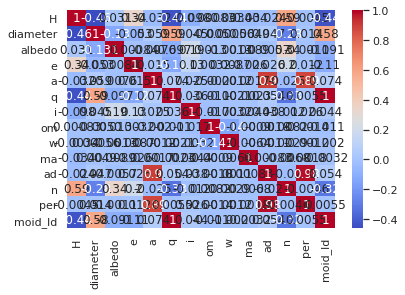

In [28]:
sns.heatmap(dataframe.corr(),cmap='coolwarm',annot=True)

In [29]:
dataframe.describe()

H       diameter         albedo              e  \
count  958524.000000  958524.000000  958524.000000  958524.000000   
mean       16.906900       4.237582       0.095562       0.156116   
std         1.785576       4.551837       0.060440       0.092643   
min        -1.100000       0.002500       0.001000       0.000000   
25%        16.100000       3.850000       0.081000       0.092193   
50%        16.900000       3.850000       0.081000       0.145002   
75%        17.700000       3.850000       0.081000       0.200650   
max        33.200000     939.400000       1.000000       1.855356   

                   a              q              i             om  \
count  958524.000000  958524.000000  958524.000000  958524.000000   
mean        2.902143       2.394887       9.054901     168.456416   
std        39.719503       2.139246       6.637656     102.881707   
min    -14702.447872       0.070511       0.007744       0.000025   
25%         2.387835       1.971401       4.165419      80.604399   
50%         2.646969       2.225816       7.415665     159.826919   
75%         3.001932       2.578315      12.407550     252.247751   
max     33488.895955      80.398819     175.082901     359.999793   

                   w             ma             ad             n  \
count  958524.000000  958524.000000  958524.000000  9.585240e+05   
mean      181.369457     177.352511       3.455819  2.366846e-01   
std       103.887995     105.816811      71.769252  7.941705e-02   
min         0.000130     -70.703676       0.653773  1.608247e-07   
25%        91.482063      83.785037       2.781604  1.894969e-01   
50%       182.358081     175.640941       3.046995  2.288655e-01   
75%       271.521589     269.865669       3.364792  2.671142e-01   
max       359.999646     491.618014   66972.796064  2.381082e+00   

                per        moid_ld  
count  9.585240e+05  958524.000000  
mean   5.085329e+03     539.422079  
std    2.308956e+06     834.839922  
min    1.511918e+02       0.000000  
25%    1.347739e+03     375.391728  
50%    1.572976e+03     477.717850  
75%    1.899765e+03     617.309237  
max    2.238462e+09   30929.908422

In [30]:
df_asteroid=dataframe[['class','diameter']]

In [31]:
df_asteroid.head(5)

class  diameter
0   MBA   939.400
1   MBA   545.000
2   MBA   246.596
3   MBA   525.400
4   MBA   106.699

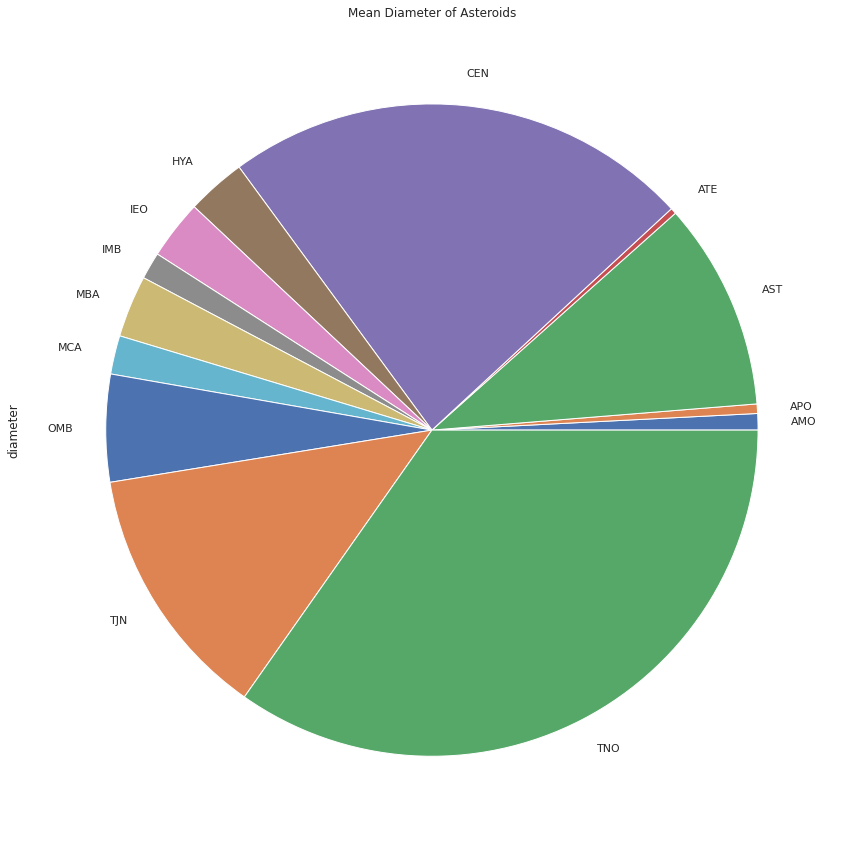

In [32]:
df_asteroid.groupby('class')['diameter'].mean().plot(kind='pie',figsize=(20,15),title='Mean Diameter of Asteroids')
plt.show()

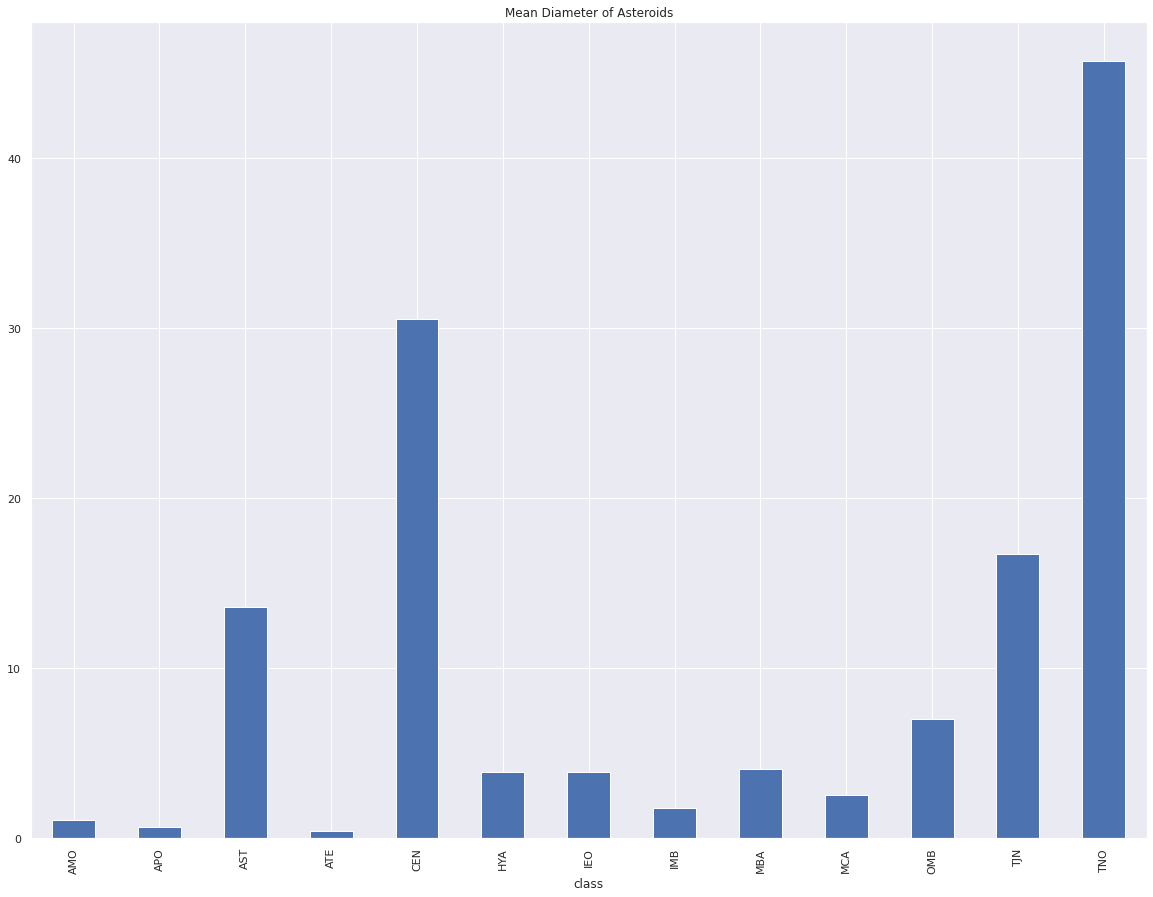

In [33]:
df_asteroid.groupby('class')['diameter'].mean().plot(kind='bar',figsize=(20,15),title='Mean Diameter of Asteroids')
plt.show()

In [34]:
dummies = pd.get_dummies(dataframe['class'])
dummies.drop(['HYA'],axis='columns',inplace=True)

In [35]:
dummies.columns

CategoricalIndex(['AMO', 'APO', 'AST', 'ATE', 'CEN', 'IEO', 'IMB', 'MBA',
                  'MCA', 'OMB', 'TJN', 'TNO'],
                 categories=['AMO', 'APO', 'AST', 'ATE', 'CEN', 'HYA', 'IEO', 'IMB', ...], ordered=False, dtype='category')

In [36]:
df_final = pd.concat([dataframe,dummies],axis='columns')

In [37]:
df_final.columns

Index(['H', 'diameter', 'albedo', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad',
       'n', 'per', 'moid_ld', 'class', 'AMO', 'APO', 'AST', 'ATE', 'CEN',
       'IEO', 'IMB', 'MBA', 'MCA', 'OMB', 'TJN', 'TNO'],
      dtype='object')

In [38]:
df_final.drop(['class'],axis='columns',inplace=True)

In [39]:
df_final.head()

H  diameter  albedo         e         a         q          i  \
0  3.40   939.400  0.0900  0.076009  2.769165  2.558684  10.594067   
1  4.20   545.000  0.1010  0.229972  2.773841  2.135935  34.832932   
2  5.33   246.596  0.2140  0.256936  2.668285  1.982706  12.991043   
3  3.00   525.400  0.4228  0.088721  2.361418  2.151909   7.141771   
4  6.90   106.699  0.2740  0.190913  2.574037  2.082619   5.367427   

           om           w          ma  ...  AST  ATE  CEN  IEO  IMB  MBA  MCA  \
0   80.305531   73.597695   77.372098  ...    0    0    0    0    0    1    0   
1  173.024741  310.202392  144.975675  ...    0    0    0    0    0    1    0   
2  169.851482  248.066193  125.435355  ...    0    0    0    0    0    1    0   
3  103.810804  150.728541   95.861938  ...    0    0    0    0    0    1    0   
4  141.571026  358.648418   17.846343  ...    0    0    0    0    0    1    0   

   OMB  TJN  TNO  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0  

[5 rows x 26 columns]

In [40]:
print(dummies.columns)
dummies.head(5)

CategoricalIndex(['AMO', 'APO', 'AST', 'ATE', 'CEN', 'IEO', 'IMB', 'MBA',
                  'MCA', 'OMB', 'TJN', 'TNO'],
                 categories=['AMO', 'APO', 'AST', 'ATE', 'CEN', 'HYA', 'IEO', 'IMB', ...], ordered=False, dtype='category')


AMO  APO  AST  ATE  CEN  IEO  IMB  MBA  MCA  OMB  TJN  TNO
0    0    0    0    0    0    0    0    1    0    0    0    0
1    0    0    0    0    0    0    0    1    0    0    0    0
2    0    0    0    0    0    0    0    1    0    0    0    0
3    0    0    0    0    0    0    0    1    0    0    0    0
4    0    0    0    0    0    0    0    1    0    0    0    0

In [41]:
#from sklearn.preprocessing import OneHotEncoder
#onehotencoder = OneHotEncoder(handle_unknown='ignore')

In [42]:
from sklearn.preprocessing import LabelBinarizer
labelbinarizer = LabelBinarizer()

In [43]:
#onehot_df = pd.DataFrame(onehotencoder.fit_transform(dataframe[['class']]).toarray(),columns=onehotencoder.get_feature_names())

In [44]:
label_df = pd.DataFrame(labelbinarizer.fit_transform(dataframe[['class']]),columns=pd.get_dummies(dataframe['class']).columns)

In [45]:
label_df.head(5)

AMO  APO  AST  ATE  CEN  HYA  IEO  IMB  MBA  MCA  OMB  TJN  TNO
0    0    0    0    0    0    0    0    0    1    0    0    0    0
1    0    0    0    0    0    0    0    0    1    0    0    0    0
2    0    0    0    0    0    0    0    0    1    0    0    0    0
3    0    0    0    0    0    0    0    0    1    0    0    0    0
4    0    0    0    0    0    0    0    0    1    0    0    0    0

In [46]:
dataframe['class'].unique()

['MBA', 'OMB', 'MCA', 'AMO', 'IMB', ..., 'ATE', 'AST', 'TNO', 'IEO', 'HYA']
Length: 13
Categories (13, object): ['MBA', 'OMB', 'MCA', 'AMO', ..., 'AST', 'TNO', 'IEO', 'HYA']

In [47]:
X = dataframe.drop(['class','moid_ld','ad','per','om','w','ma'],axis=1)

In [48]:
X.shape


(958524, 8)

In [49]:
X.columns

Index(['H', 'diameter', 'albedo', 'e', 'a', 'q', 'i', 'n'], dtype='object')

In [50]:
y = label_df

In [51]:
y.shape

(958524, 13)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
#from sklearn import preprocessing
#scaler = preprocessing.RobustScaler().fit(X)
#X_new = scaler.transform(X)
#stnd_scale = preprocessing.StandardScaler().fit(X_new)
#X_stsc = stnd_scale.transform(X_new)
#min_max = preprocessing.MinMaxScaler().fit(X_new)
#X_minmax = min_max.transform(X_new)

In [54]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler().fit(X)
#scaler = preprocessing.StandardScaler().fit(X)
#scaler = preprocessing.MinMaxScaler().fit(X)
X_scale = scaler.transform(X)

In [55]:
#import numpy as np
#print('Dataset mean:{:.2f} and standard deviation:{:.2f}'.format(np.average(X_new),np.std(X_new)))

In [56]:
#X_data = pd.DataFrame(X_scale,columns=['H', 'diameter', 'albedo', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad',
#       'n', 'per', 'moid_ld'])

In [57]:
X_data = pd.DataFrame(X_scale,columns=X.columns)

In [58]:
X_data.shape

(958524, 8)

In [59]:
X_data.describe()

H       diameter         albedo              e  \
count  958524.000000  958524.000000  958524.000000  958524.000000   
mean        0.004312       0.387582       0.014562       0.102479   
std         1.115985       4.551837       0.060440       0.854185   
min       -11.250000      -3.847500      -0.080000      -1.336947   
25%        -0.500000       0.000000       0.000000      -0.486908   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.500000       0.000000       0.000000       0.513092   
max        10.187500     935.550000       0.919000      15.769833   

                   a              q             i              n  
count  958524.000000  958524.000000  9.585240e+05  958524.000000  
mean        0.415527       0.278576  1.988850e-01       0.100739  
std        64.679504       3.524790  8.053325e-01       1.023188  
min    -23945.874452      -3.551251 -8.987871e-01      -2.948639  
25%        -0.421976      -0.419194 -3.943453e-01      -0.507214  
50%         0.000000       0.000000  5.388040e-17       0.000000  
75%         0.578024       0.580806  6.056547e-01       0.492786  
max     54529.231038     128.804017  2.034270e+01      27.728567

In [60]:
from dask.distributed import Client
import joblib

client = Client(n_workers=32)
client

<Client: 'tcp://127.0.0.1:40358' processes=32 threads=32, memory=214.75 GB>

In [61]:
import dask.dataframe as dd

In [62]:
X_dask = dd.from_pandas(X, npartitions=100)
X_dask = X_dask.persist()
y_dask = dd.from_pandas(y, npartitions=100)
y_dask = y_dask.persist()

In [63]:
from dask_ml.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dask, y_dask, test_size=0.4, random_state=42, shuffle=True)

In [64]:
import dask
X_train, X_test, y_train, y_test = dask.persist(X_train, X_test, y_train, y_test)

In [65]:
print(X_train.shape)
print(X_test.shape)

(Delayed('int-cb2235fb-0801-4db5-a6f7-a2800926d587'), 8)
(Delayed('int-ffdf489b-b009-46f6-bd8f-c7002955b00f'), 8)


In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [67]:
p = [1,2]
leaf_size = list(range(30,40,1))
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
n_neighbors = list(range(5,17,2))

In [68]:
param_grid = dict(p=p,leaf_size=leaf_size,weights=weights,metric=metric,n_neighbors=n_neighbors)

In [69]:
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10,random_state=10)

In [70]:
knn = KNeighborsClassifier()

In [71]:
import dask_ml.model_selection as dcv
rand_se = dcv.RandomizedSearchCV(estimator=knn,param_distributions=param_grid,n_iter=10,scoring='accuracy',cv=cv,random_state=11,n_jobs=-1)

In [72]:
rand_se.fit(X_train,y_train)

RandomizedSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=10),
                   estimator=KNeighborsClassifier(),
                   param_distributions={'leaf_size': [30, 31, 32, 33, 34, 35,
                                                      36, 37, 38, 39],
                                        'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=11, scoring='accuracy')

In [73]:
# summarize result
print('Best Score: %s' %rand_se.best_score_)
print('Best Hyperparameters: %s' %rand_se.best_params_)
print('Best Estimator: %s' %rand_se.best_estimator_)

Best Score: 0.9916144905109235
Best Hyperparameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 5, 'metric': 'minkowski', 'leaf_size': 31}
Best Estimator: KNeighborsClassifier(leaf_size=31, p=1, weights='distance')
